In [1]:
#Basic Libraries
import numpy as np
import pandas as pd

#Visualisation libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep learning Libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [2]:
#!pip install pydot

In [3]:
#!pip install tensorflow

In [4]:
#!pip install --upgrade keras

In [5]:
#pip show scikit-learn

In [6]:
#pip install -U scikit-learn

In [7]:
#!pip install keras

In [8]:
#pip show keras
# version 3.9.2

In [9]:
#pip show tensorflow
# version 2.19.0

In [10]:
#!pip install scikeras
# version 0.13.0

In [11]:
#Digit mnist dataset
mnist.load_data()

#this gives the array of neurons for each digit

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [12]:
# we could see it gives output in form of xtrain, ytrain and xtest, ytest
(X_train_digit,y_train_digit),(X_test_digit,y_test_digit)=mnist.load_data()

In [13]:
X_train_digit[0].shape

(28, 28)

In [14]:
X_train_digit[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
X_train_digit.shape

(60000, 28, 28)

In [16]:
X_test_digit.shape

(10000, 28, 28)

In [17]:
y_train_digit.shape

(60000,)

In [18]:
y_train_digit[59999]

np.uint8(8)

In [19]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
#Names of the numbers in dataset in order
col_names= ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

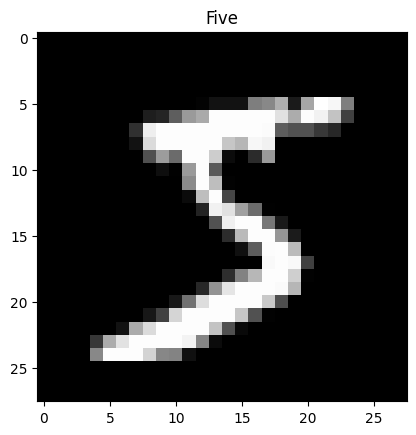

In [21]:
#Visualisation of digits
plt.imshow(X_train_digit[0],cmap='grey')
#X_train_digit[0] shape is 28,28 which is 2D grey scale image
#plt.imshow() is used to visualize 2D/3D arrays as images.
plt.title(col_names[y_train_digit[0]])
plt.show()

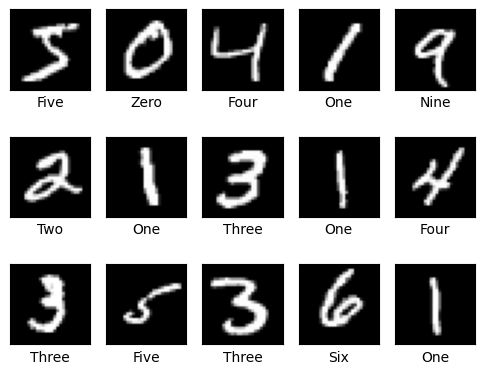

In [22]:
plt.figure(figsize=(6,8))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # this removes the graphical numericals from xaxis
    plt.yticks([]) # this removes the graphical numericals from yaxis
    plt.imshow(X_train_digit[i],cmap='grey')# plt.imshow() is used to visualize 2D/3D arrays as images.
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [23]:
X_train_digit.shape

(60000, 28, 28)

In [24]:
X_train_digit=X_train_digit.reshape(60000,784)
X_test_digit=X_test_digit.reshape(10000,784)

In [25]:
X_train_digit[1] # shows single row values at index 1 , it has joined the seperate individual 28arrays to one single array of 784 columns

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [26]:
X_train_digit[1] .shape

(784,)

In [27]:
y_train_digit.shape

(60000,)

#HERE WE HAVE TO CONVERT THE OUTPUT TRAIN SET INTO ONEHOT ENCODING FORMAT, HERE WE HAVE NUMBERS TILL 10, WE CAN USE 10CLASSES

#to_categorical() converts integer labels into one-hot vectors.

#Required for categorical_crossentropy loss in Keras/TensorFlow.

#Shape changes: From (N,) to (N, num_classes).

In [28]:
y_train_digit= to_categorical(y_train_digit,num_classes=10)

In [29]:
y_train_digit.shape

(60000, 10)

In [30]:
y_test_digit= to_categorical(y_test_digit,num_classes=10)

In [31]:
#CREATING BASE NEURAL NETWORK
model= keras.Sequential([layers.Dense(256,activation='relu',input_shape=(784,)),# this shape here is a tuple which displays 1D data), it expects 784 nuerons as input for each sample image
                         #layers.dropou(=0.3),-- teachers reducing mark for students wantedly in revisions
                         #layers.BatchNormalization(),-- normalising images of each batch
                         layers.Dense(64,activation='relu'),
                         #here no input shape cuz previous layer o/p is its input
                         layers.Dense(64,activation='relu'),
                         layers.Dense(10,activation='sigmoid')])

C:\anaconda3\envs\AI\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# HERE THE INPUT SHAPE ONLY DISPLAYS COLUN FEATURES OF EACH SAMPLE INPUT IMAGE AS A TUPLE, KERAS AUTOMATICALLY VARIES THE BATCH SIZE ACCORDINGLY
#4. Why Not (60000, 784)?
#The model should work with:

#Different batch sizes

#Validation data (which has different sample count)

#Production usage (where you predict one at a time)

#input_shape defines the "template" for one sample

# Option 1: With warning (legacy)
model = Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)), 
    # Triggers warning
    # ... other layers ...
])

# Option 2: Recommended (no warning)
model = Sequential([
    Input(shape=(784,)), 
    # Clean separation of concerns
    layers.Dense(256, activation='relu'),
    # ... other layers ...
])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# WHAT IS PARAMS? SUM OF WEIGHTS AND BIAS IN EACH LAYER- THAT CAN BE VARIED TO GET THE BEST OUTPUT

In [35]:
#param_number= output_channel_number*(input_channel_number+1)

In [36]:
# Compilimg the model
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics= ['accuracy'])

In [37]:
history= model.fit(X_train_digit,y_train_digit, batch_size=100, epochs=10, validation_data=(X_test_digit,y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4539 - loss: 5.0659 - val_accuracy: 0.5988 - val_loss: 0.3672
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6270 - loss: 0.3015 - val_accuracy: 0.5248 - val_loss: 0.2776
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6140 - loss: 0.1920 - val_accuracy: 0.6278 - val_loss: 0.2012
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6047 - loss: 0.1460 - val_accuracy: 0.6137 - val_loss: 0.1970
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6382 - loss: 0.1177 - val_accuracy: 0.6129 - val_loss: 0.1818
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5945 - loss: 0.1108 - val_accuracy: 0.6265 - val_loss: 0.1804
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5838 - loss: 0.0980 - val_accuracy: 0.6215 - val_loss: 0.2441
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6608 - loss: 0.0960 - val_accuracy: 0.

In [38]:
y_predict=model.predict(X_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [39]:
y_predict

array([[2.1081039e-01, 8.0833364e-01, 9.9990207e-01, ..., 1.0000000e+00,
        7.8216851e-01, 9.9999964e-01],
       [9.9999648e-01, 9.9493259e-01, 1.0000000e+00, ..., 1.4155095e-02,
        9.9999440e-01, 9.9893254e-01],
       [6.2562577e-02, 9.9999958e-01, 9.9844331e-01, ..., 8.8093710e-01,
        9.5630676e-01, 5.9917897e-01],
       ...,
       [1.2526177e-04, 9.9988806e-01, 9.9346131e-01, ..., 9.9962723e-01,
        9.9999988e-01, 1.0000000e+00],
       [9.9999958e-01, 9.9966943e-01, 3.0908096e-01, ..., 9.9999958e-01,
        1.0000000e+00, 1.0000000e+00],
       [9.9996358e-01, 7.3169613e-01, 9.9148385e-02, ..., 9.9999946e-01,
        9.9869502e-01, 1.2166844e-06]], dtype=float32)

In [40]:
y_predicts=np.argmax(y_predict)
y_predicts

#this flattens the array and gives the total combined max value of all samples

np.int64(7)

In [41]:
y_predicts=np.argmax(y_predict,axis=1)
y_predicts
# this gives the max value of each sample

array([7, 2, 1, ..., 4, 3, 6])

In [42]:
y_test_digit

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
#Here y_test_digit is not in the desired format so we have to convert it to a format so that it can be compared with y_predicts

In [44]:
y_test_digit_eval=np.argmax(y_test_digit,axis=1)
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6])

In [45]:
#EVALUATION METRICS
#CONFUSION MATRIX FOR DIGIT MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
con_mat

array([[ 967,    1,    3,    0,    1,    0,    5,    2,    1,    0],
       [   7, 1117,    0,    1,    0,    1,    3,    2,    2,    2],
       [  53,   31,  930,    7,    1,    0,    1,    3,    4,    2],
       [   4,  845,   42,  106,    0,    2,    0,    4,    3,    4],
       [   0,  150,    2,  200,  596,    1,    8,    5,    3,   17],
       [ 587,   31,    0,  115,    2,  144,    3,    1,    4,    5],
       [ 145,    2,    3,    1,   29,  131,  639,    1,    6,    1],
       [   1,    5,  104,   25,   10,   25,    0,  847,    0,   11],
       [   1,    1,   50,  137,    4,   10,    0,    3,  763,    5],
       [   4,   29,    1,  174,  165,   10,    0,   46,    2,  578]])

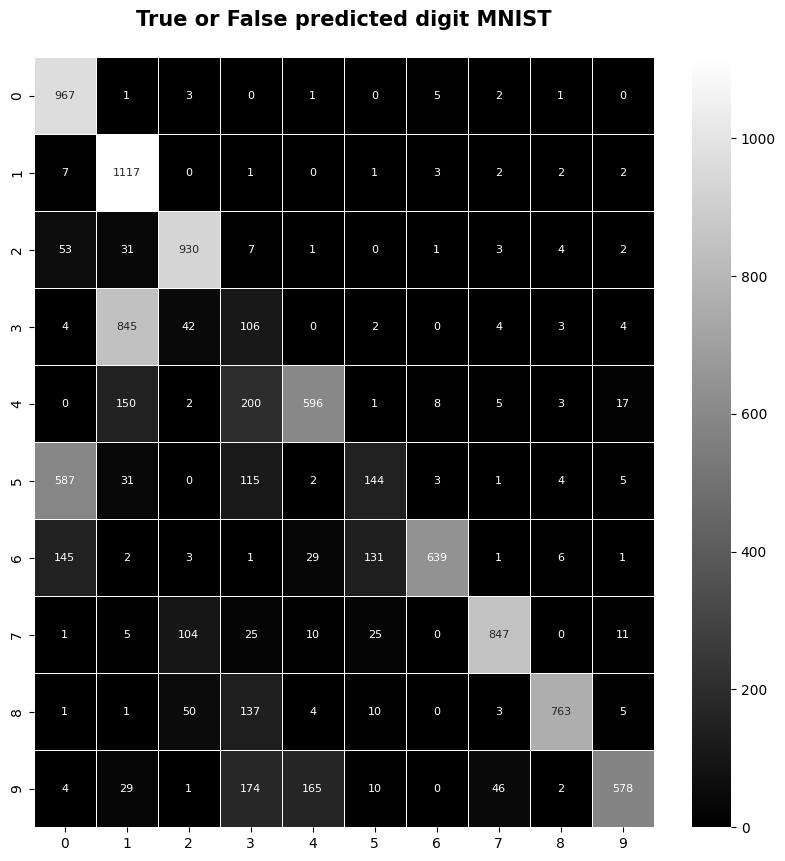

In [46]:
#plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':8},linewidth=0.5,cmap='grey',fmt='d')
plt.title('True or False predicted digit MNIST\n', fontweight='bold',fontsize=15) #\n leaves a line below and starts the next line of code
plt.show()
# Here the diagonal values display the right set of predictions

In [47]:
print(plt.style.available) # only these can be used for plt.style.use

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [48]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.55      0.99      0.70       980
           1       0.50      0.98      0.67      1135
           2       0.82      0.90      0.86      1032
           3       0.14      0.10      0.12      1010
           4       0.74      0.61      0.67       982
           5       0.44      0.16      0.24       892
           6       0.97      0.67      0.79       958
           7       0.93      0.82      0.87      1028
           8       0.97      0.78      0.87       974
           9       0.92      0.57      0.71      1009

    accuracy                           0.67     10000
   macro avg       0.70      0.66      0.65     10000
weighted avg       0.70      0.67      0.65     10000



In [49]:
history.history.keys()
# IT containes the key meytrics used in fitting the model

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

The .fit() method returns a History object, which contains details about the training process.

Inside it, history.history is a dictionary that stores metrics for each epoch.

In [50]:
history.history['accuracy']

[0.5625666379928589,
 0.6254166960716248,
 0.6230499744415283,
 0.6061166524887085,
 0.628250002861023,
 0.6048166751861572,
 0.6005333065986633,
 0.6570500135421753,
 0.6416500210762024,
 0.6553999781608582]

In [51]:
history.history['val_accuracy']

[0.598800003528595,
 0.5248000025749207,
 0.6277999877929688,
 0.6136999726295471,
 0.6129000186920166,
 0.6265000104904175,
 0.6215000152587891,
 0.6614999771118164,
 0.6184999942779541,
 0.6434999704360962]

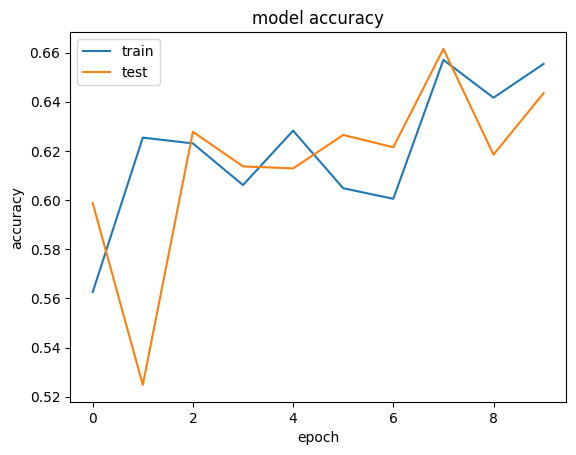

In [52]:
# ACCURACY PLOTS OF TRAIN SET AND VALIDATION SET in each epoc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

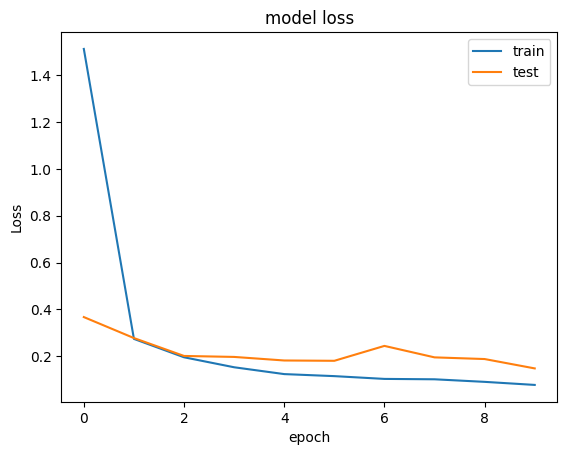

In [53]:
# LOSS PLOTS OF TRAIN SET AND VALIDATION SET in each epoc
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

In [56]:
# Prediction for single input
y_predict_single= model.predict(X_test_digit[2].reshape(1,784))
y_predict_single

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0.06256259, 0.9999996 , 0.9984433 , 0.86591846, 0.27487755,
        0.00904668, 0.96459585, 0.8809371 , 0.9563068 , 0.59917957]],
      dtype=float32)

In [57]:
y_predicts_single=np.argmax(y_predict_single,axis=1)
y_predicts_single

array([1])

In [58]:
y_predicts_single[0]

np.int64(1)

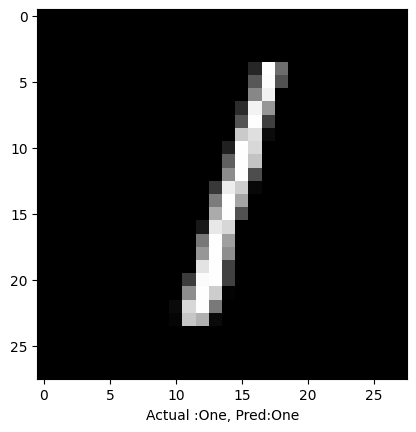

In [59]:
#Names of the numbers in dataset in order
col_names= ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
plt.imshow(X_test_digit[2].reshape(28,28),cmap='grey')
plt.xlabel("Actual :{}, Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [60]:
X_test_digit[[2]].shape

(1, 784)

In [61]:
X_test_digit[2].reshape(1,784)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 254,
        109,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         87, 252,  82,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [62]:
y_predict_singles= model.predict(X_test_digit[[2]])
y_predict_singles

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[0.06256259, 0.9999996 , 0.9984433 , 0.86591846, 0.27487755,
        0.00904668, 0.96459585, 0.8809371 , 0.9563068 , 0.59917957]],
      dtype=float32)

In [63]:
X_test_digit[[2]].shape

(1, 784)

In [64]:
X_test_digit[2].shape

(784,)